Exercício 1

In [53]:
#bibliotecas 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.pyplot as plt

In [54]:
#função para integração das funções distribuição pelo método dos retângulos
def integracao(funcao,a, b):
  t = np.linspace(a,b,10000)
  largura = t[1]-t[0]
  integral = np.cumsum(funcao(t[:-1]))*largura
  return integral[len(integral) - 1]


In [55]:
#inicialização dos valores mínimos, máximos das funções
#inicialização dos valores de Xmin e Xmax 
distribuicao = np.array([[4,8],
                         [10,2]])
comprimentos_distribuicao = np.array([[0,4],
                                      [4,7]])                     

In [56]:
#determinacao das respectivas funcoes lineares
#calculo da força resultante da distribuicao integrando
#obtencao da posicao da forca resultante (x_barra)}

def reacoesDeApoio(dist,comp_dist):
  funcoes = list()
  coef = list()
  Forca_resultante = 0
  Momento = 0
  for i in range(0, len(dist)):
    coef.append((dist[i][1] - dist[i][0]) / (comp_dist[i][1] - comp_dist[i][0]))
    funcoes.append(lambda x, i = i: (coef[i]*(x - comp_dist[i][0]) + dist[i][0]))
    Forca_resultante += integracao(funcoes[i],comp_dist[i][0],comp_dist[i][1])
    Momento += integracao(lambda x : x*funcoes[i](x),comp_dist[i][0],comp_dist[i][1])
    
  x_barra = Momento / Forca_resultante
  Forca_resultante = -round(Forca_resultante)
  print(f"Força resultante: {Forca_resultante}kN")
  print(f"Posição da força resultante: {x_barra:.2f}m")
  
  comprimento_maximo = np.max(comp_dist[:, 1])

  Vb = Momento / comprimento_maximo
  x = sp.symbols('x')
  Va = -Forca_resultante - Vb

  return round(Va,3),round(Vb,3)

In [57]:
Va,Vb = reacoesDeApoio(distribuicao,comprimentos_distribuicao)
print(f"Reação de apoio vertical em A: {Va}kN")
print(f"Reação de apoio vertical em B: {Vb}kN")

Força resultante: -42kN
Posição da força resultante: 3.48m
Reação de apoio vertical em A: 21.096kN
Reação de apoio vertical em B: 20.904kN


Exercício 2

In [58]:
def reacoesDeApoio2(dist,comp_dist):
    funcao = dist
    Forca_resultante = 0
    Momento = 0
    Forca_resultante += integracao(funcao,0,comp_dist)
    Momento += integracao(lambda x : x*funcao(x),0,comp_dist)
    x_barra = Momento / Forca_resultante
    Forca_resultante = -Forca_resultante
    print(f"Força resultante: {Forca_resultante}kN")
    print(f"Posição da força resultante: {x_barra:.2f}m")

    comprimento_maximo = comp_dist

    Vb = Momento / comprimento_maximo
    Va = -Forca_resultante - Vb

    return Va,Vb


In [59]:
#Configura o tipo da função
#Acha as reações de apoio e aplica na condição de contorno para a EDO dv/dx = -w(x)
x = sp.symbols('x')
v = sp.Function('v')
w = x**4
w_lambda = sp.lambdify(x,w,"numpy")
Va,Vb = reacoesDeApoio2(w_lambda,6)
print(Va,Vb)
eq_dif = sp.Eq(sp.diff(v(x),x),-w)
cortante = sp.dsolve(eq_dif,ics = {v(0) : Va})
funcao_cortante = sp.lambdify(x, cortante.rhs, "numpy")
cortante

Força resultante: -1554.8111870413018kN
Posição da força resultante: 5.00m
259.1999935187075 1295.6111935225942


Eq(v(x), 259.199993518708 - x**5/5)

Valores onde o cortante se anula: [4.19296269166048, -3.39217807433345 - 2.46456163357058*I, -3.39217807433345 + 2.46456163357058*I, 1.29569672850321 - 3.98774449048617*I, 1.29569672850321 + 3.98774449048617*I] (favor ignorar as raízes complexas)


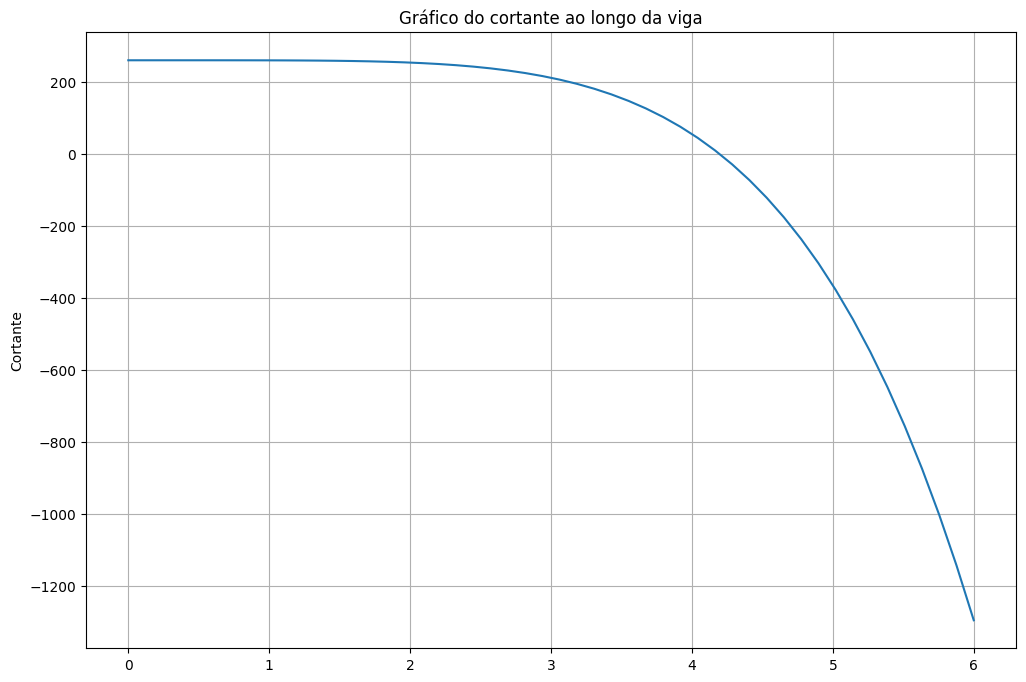

In [60]:
x_plot = np.linspace(0,6)
y_plot = funcao_cortante(x_plot)

#onde o cortante se anula
eq = sp.Eq(funcao_cortante(x),0)
X = sp.solve(eq)
print(f"Valores onde o cortante se anula: {X} (favor ignorar as raízes complexas)")
#gráfico do cortante
plt.figure(figsize=(12,8))
plt.title("Gráfico do cortante ao longo da viga")
plt.ylabel("Cortante")
plt.plot(x_plot,y_plot)
plt.grid(True) 
plt.show() 


In [61]:
#acha a eq do momento fletor baseado na EDO dM/dx = V(x)

M = sp.Function('M')
eq = sp.Eq(sp.diff(M(x),x) + funcao_cortante(x),0)
momento_fletor = sp.dsolve(eq,ics = {M(0) : 0})
funcao_momento = sp.lambdify(x,momento_fletor.rhs,"numpy")
momento_fletor

Eq(M(x), 0.0333333333333333*x**6 - 259.199993518708*x)

Valores de máximo local (favor ignorar as raízes complexas): [4.19296269166048, -3.39217807433345 - 2.46456163357058*I, -3.39217807433345 + 2.46456163357058*I, 1.29569672850321 - 3.98774449048617*I, 1.29569672850321 + 3.98774449048617*I]


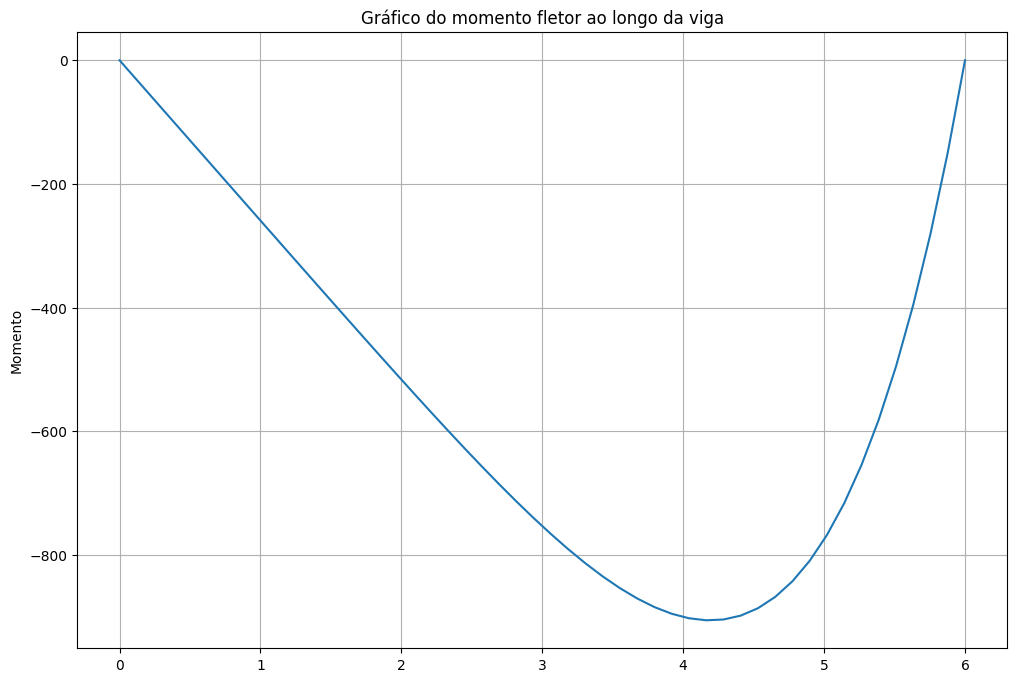

In [62]:
x_plot = np.linspace(0,6)
y_plot = funcao_momento(x_plot)

#onde o momento é máximo
eq = sp.Eq(sp.diff(funcao_momento(x),x),0)
X = sp.solve(eq)
print(f"Valores de máximo local (favor ignorar as raízes complexas): {X}")


plt.figure(figsize=(12,8))
plt.title("Gráfico do momento fletor ao longo da viga")
plt.ylabel("Momento")
plt.grid(True) 
plt.plot(x_plot,y_plot)
plt.show()

In [63]:
def calcula_Momento_inercia(retangulos,tipos): 
    
    
    min_x = np.min(retangulos[:, :, 0], axis=1)
    max_x = np.max(retangulos[:, :, 0], axis=1)
    min_y = np.min(retangulos[:, :, 1], axis=1)
    max_y = np.max(retangulos[:, :, 1], axis=1)
    
    bases = max_x - min_x
    alturas = max_y - min_y
    
    areas = bases * alturas * tipos
    
    area_total = np.sum(areas)
    
    x_centros_locais = (min_x + max_x) / 2
    y_centros_locais = (min_y + max_y) / 2
    
    X_global = np.sum(areas * x_centros_locais) / area_total
    Y_global = np.sum(areas * y_centros_locais) / area_total
    
    Ix_locais = (bases * alturas**3) / 12
    Iy_locais = (alturas * bases**3) / 12
    
    dist_y = y_centros_locais - Y_global
    dist_x = x_centros_locais - X_global
    
    Ix_total = np.sum((Ix_locais * tipos) + (areas * dist_y**2))
    Iy_total = np.sum((Iy_locais * tipos) + (areas * dist_x**2))

    
    return Ix_total, Iy_total
    



def calcula_Momento_inercia_polar(raios, tipos):
    I_polar = (np.pi * np.array(raios)**4) / 2
    return np.sum(I_polar * np.array(tipos))
    
    
r1 = [(30,0), (60,0), (30,40), (60,40)]
r2=  [(0,40), (0,60), (90,40), (90,60)]

retangulos = np.array([r1, r2])
tipos = np.array([1, 1]) 
momento_de_inercia = calcula_Momento_inercia(retangulos, tipos)

raios = [30,22] 
tipo_polar = [1,-1]
momento_polar = calcula_Momento_inercia_polar(raios, tipo_polar)

print("Momento de Inércia Ix:", momento_de_inercia[0])
print("Momento de Inércia Iy:", momento_de_inercia[1])
print("Momento de Inércia Polar" , momento_polar)

Momento de Inércia Ix: 868000.0
Momento de Inércia Iy: 1305000.0
Momento de Inércia Polar 904376.5603742008


In [64]:
# I_x = base* altura**3 / 12 + (area*y_centro**2)
# I_y = altura * base**3 / 12 + (area*x_centro**2)
# return I_x, I_y



# retangulo = np.array([[(0,0),(6,0),(6,25),(0,25)]])

# base = retangulo[:,1,0]
# altura = retangulo[:,2,1]

# x_centro = base / 2
# y_centro = altura / 2
# area = base * altura

# momentoIncercia = calcula_Momento_inercia(x_centro, y_centro, base, altura)
# print(momentoIncercia[0])
# print(momentoIncercia[1])